In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

data = pd.read_csv("Disease_symptom_and_patient_profile_dataset.csv")

# Separating features and target variables
X = data.drop(columns=['Outcome Variable'])
y = data['Outcome Variable']

# Splitting the data into two sets: train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing action
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])

# Initializing the classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier()
}

# Training and evaluating  each classifier
for name, classifier in classifiers.items():
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', classifier)])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"Classifier: {name}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)


Classifier: Logistic Regression
              precision    recall  f1-score   support

    Negative       0.45      0.17      0.24        30
    Positive       0.58      0.85      0.69        40

    accuracy                           0.56        70
   macro avg       0.52      0.51      0.47        70
weighted avg       0.52      0.56      0.50        70

--------------------------------------------------
Classifier: Random Forest
              precision    recall  f1-score   support

    Negative       0.29      0.17      0.21        30
    Positive       0.53      0.70      0.60        40

    accuracy                           0.47        70
   macro avg       0.41      0.43      0.41        70
weighted avg       0.43      0.47      0.44        70

--------------------------------------------------
Classifier: Support Vector Machine
              precision    recall  f1-score   support

    Negative       0.44      0.27      0.33        30
    Positive       0.58      0.75      0.6

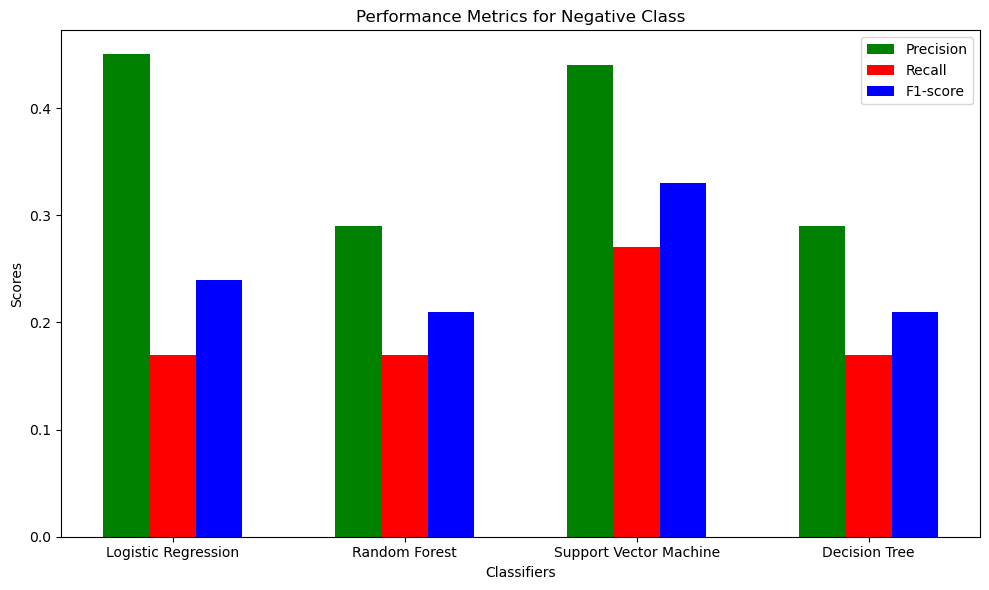

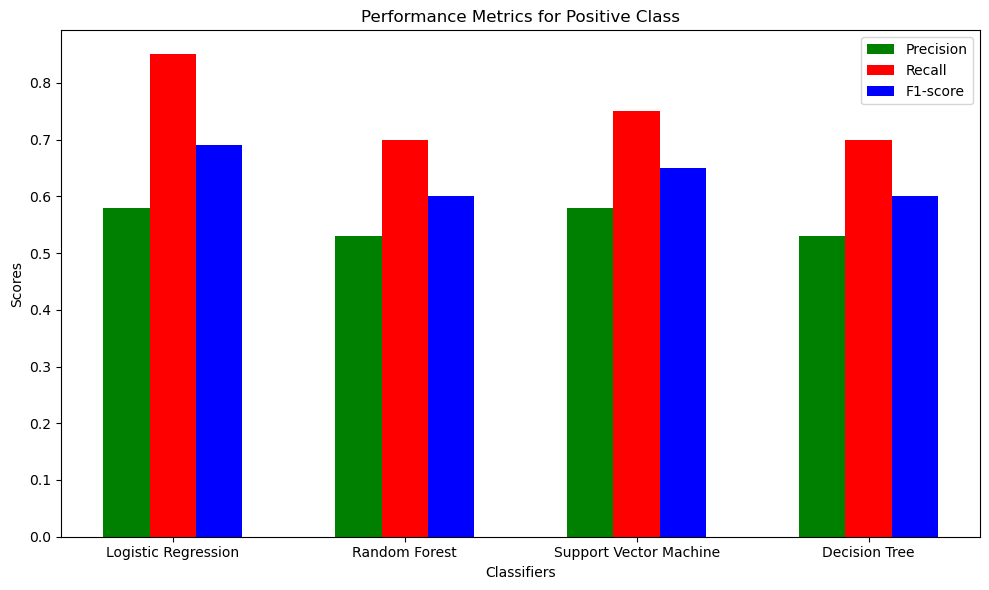

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Evaluated classification reports 
classifiers = ['Logistic Regression', 'Random Forest', 'Support Vector Machine', 'Decision Tree']

precision_negative = [0.45, 0.29, 0.44, 0.29]
recall_negative = [0.17, 0.17, 0.27, 0.17]
f1_score_negative = [0.24, 0.21, 0.33, 0.21]

precision_positive = [0.58, 0.53, 0.58, 0.53]
recall_positive = [0.85, 0.70, 0.75, 0.70]
f1_score_positive = [0.69, 0.60, 0.65, 0.60]

# Plotting of precision, recall, and f1-score for the negative class
plt.figure(figsize=(10, 6))
bar_width = 0.2
index = np.arange(len(classifiers))

plt.bar(index, precision_negative, bar_width, label='Precision', color='g')
plt.bar(index + bar_width, recall_negative, bar_width, label='Recall', color='r')
plt.bar(index + 2 * bar_width, f1_score_negative, bar_width, label='F1-score', color='b')

plt.xlabel('Classifiers')
plt.ylabel('Scores')
plt.title('Performance Metrics for Negative Class')
plt.xticks(index + bar_width, classifiers)
plt.legend()
plt.tight_layout()
plt.show()

# Plotting of precision, recall, and f1-score for the positive class
plt.figure(figsize=(10, 6))

plt.bar(index, precision_positive, bar_width, label='Precision', color='g')
plt.bar(index + bar_width, recall_positive, bar_width, label='Recall', color='r')
plt.bar(index + 2 * bar_width, f1_score_positive, bar_width, label='F1-score', color='b')

plt.xlabel('Classifiers')
plt.ylabel('Scores')
plt.title('Performance Metrics for Positive Class')
plt.xticks(index + bar_width, classifiers)
plt.legend()
plt.tight_layout()
plt.show()
